In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from umap import UMAP
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Selección de variables

In [2]:
df = pd.read_csv("egemaps_LA.csv")
labels = pd.read_csv("/home/juanjo/Documentos/eGeMAPS_embedding/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt", 
                     sep=' ', header=None, names=["h1", "audio", "h2", "h3", "label"])
labels = labels.filter(items=["audio", "label"])

# le quitamos el .flac a los nombres de los audios
df["audio"] = df["audio"].apply(lambda x: x.replace(".flac", ""))

df = pd.merge(df, labels, on="audio")
# 
df.head()

,Unnamed: 0,audio,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,label
0,0,LA_T_9054834,22.778221,0.098499,21.302931,22.475891,24.721390,3.418459,100.164154,105.332596,...,0.011031,0.175287,3.559871,1.644737,0.172000,0.178146,0.345000,0.414035,-17.783484,spoof
1,1,LA_T_6980436,28.998428,0.088787,27.743202,29.003092,30.589899,2.846697,136.143051,166.834427,...,0.000337,0.405845,5.720339,4.077253,0.095789,0.066989,0.135000,0.103401,-17.886377,spoof
2,2,LA_T_2117042,32.400963,0.143300,30.407715,34.263645,35.941391,5.533676,138.879913,87.293884,...,0.023323,0.097204,3.652968,2.803739,0.200000,0.145373,0.115714,0.102240,-18.018290,spoof
3,3,LA_T_2547007,35.747711,0.068483,34.369492,36.317474,37.616093,3.246601,215.282730,219.830231,...,0.008957,0.093073,1.825558,1.229508,0.140000,0.091469,0.558571,0.743187,-20.248434,bonafide
4,4,LA_T_1715181,34.141598,0.159520,32.097713,33.297329,34.005608,1.907894,200.921494,239.583771,...,0.007199,0.230671,4.347826,3.555556,0.141250,0.139144,0.153333,0.173461,-19.660992,spoof


Selección univariada, bueno si el problema es lineal y tenemos muchas variables

In [ ]:
y = df["label"]
x = df.drop(columns=["label", "audio"])

selector = SelectKBest(score_func=f_classif, k = 40)
selector.fit(x, y)

selected_columns = x.columns[selector.get_support()]
print(selected_columns)
#x_new = SelectKBest(f_classif, k=20).fit_transform(x, y)
#x_new = pd.DataFrame(x_new, columns=x.columns)

Index(['F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'loudness_sma3_stddevNorm',
       'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0',
       'loudness_sma3_stddevRisingSlope', 'spectralFlux_sma3_amean',
       'spectralFlux_sma3_stddevNorm', 'mfcc1_sma3_amean',
       'shimmerLocaldB_sma3nz_stddevNorm', 'F1amplitudeLogRelF0_sma3nz_amean',
       'F1amplitudeLogRelF0_sma3nz_stddevNorm',
       'F2amplitudeLogRelF0_sma3nz_amean',
       'F2amplitudeLogRelF0_sma3nz_stddevNorm',
       'F3amplitudeLogRelF0_sma3nz_amean',
       'F3amplitudeLogRelF0_sma3nz_stddevNorm', 'slopeUV0-500_sma3nz_amean',
       'loudnessPeaksPerSec', 'VoicedSegmentsPerSec',
       'MeanUnvoicedSegmentLength', 'StddevUnvoicedSegmentLength'],
      dtype='object')


Text(0.5, 1.0, 'Importancia de características')

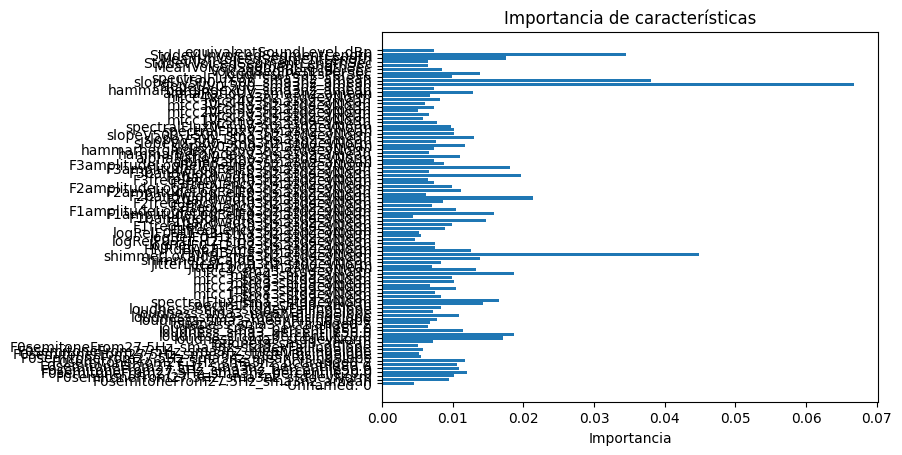

In [20]:
y = df["label"]
x = df.drop(columns=["label", "audio"])
model = RandomForestClassifier()
model.fit(x, y)

importances = model.feature_importances_

plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), x.columns)
plt.xlabel("Importancia")
plt.title("Importancia de características")

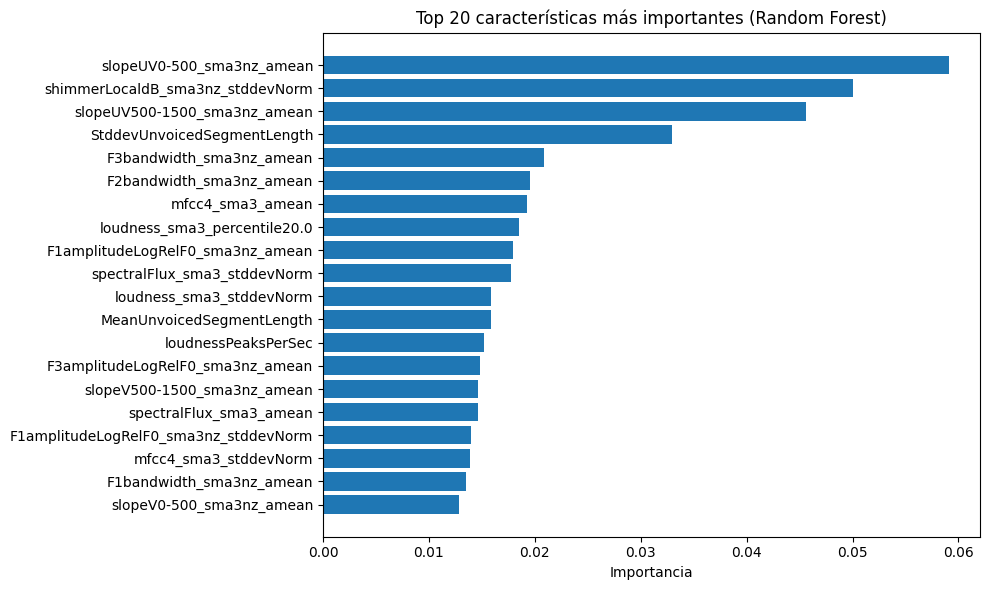

In [21]:
# Entrenamiento
y = df["label"]
x = df.drop(columns=["label", "audio"])
model = RandomForestClassifier()
model.fit(x, y)

# Importancias
importances = model.feature_importances_
feature_names = np.array(x.columns)

# ordenamos de mayor a menor segun la imporaancia
indices = np.argsort(importances)[::-1][:20]

# graficamos
plt.figure(figsize=(10, 6))
plt.barh(range(20), importances[indices][::-1])  # invertido para que el mayor esté arriba
plt.yticks(range(20), feature_names[indices][::-1])
plt.xlabel("Importancia")
plt.title("Top 20 características más importantes (Random Forest)")
plt.tight_layout()
plt.show()

Sacamos la accuracy y la matriz de confusión del random forest que nos hemos montado con el conjunto de evaluación de LA, a ver qué nos sale.

# Reducción de dimensionalidad

In [6]:
y

0           spoof
1           spoof
2           spoof
3        bonafide
4           spoof
           ...   
25375       spoof
25376       spoof
25377    bonafide
25378       spoof
25379       spoof
Name: label, Length: 25380, dtype: object

/home/juanjo/miniconda3/envs/egemaps/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/juanjo/miniconda3/envs/egemaps/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


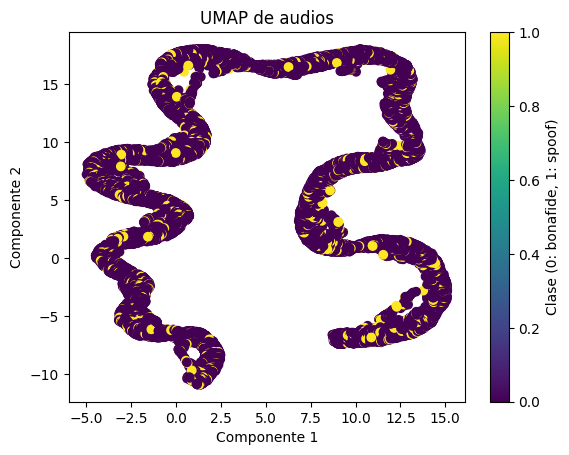

In [7]:
y = df["label"]
x = df.drop(columns=["label", "audio"])

umap = UMAP(n_components=2, random_state=42)
x_umap = umap.fit_transform(x)

plt.scatter(x_umap[:, 0], x_umap[:, 1], c=y.map({'bonafide':1, 'spoof': 0}))
plt.title("UMAP de audios")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Clase (0: bonafide, 1: spoof)')
plt.show()